In [2]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [4]:
f = open("class_names.txt","r")
# And for reading use
classes = f.readlines()
f.close()
class_names = [c.replace('\n','').replace(' ','_') for c in classes]

In [5]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")
num_classes = len(class_names)
image_size = 28

In [6]:
print(len(x_train))

1104000


car


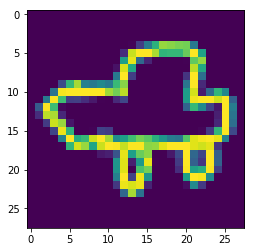

In [16]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [17]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(345, activation='softmax')) 
# Train model
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [20]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Train on 993600 samples, validate on 110400 samples
Epoch 1/5
 - 307s - loss: 2.6879 - top_k_categorical_accuracy: 0.6707 - val_loss: 2.1402 - val_top_k_categorical_accuracy: 0.7720
Epoch 2/5
 - 114s - loss: 2.0074 - top_k_categorical_accuracy: 0.7918 - val_loss: 1.9259 - val_top_k_categorical_accuracy: 0.8037
Epoch 3/5
 - 101s - loss: 1.8545 - top_k_categorical_accuracy: 0.8140 - val_loss: 1.8214 - val_top_k_categorical_accuracy: 0.8205
Epoch 4/5
 - 101s - loss: 1.7705 - top_k_categorical_accuracy: 0.8261 - val_loss: 1.7762 - val_top_k_categorical_accuracy: 0.8268
Epoch 5/5
 - 92s - loss: 1.7164 - top_k_categorical_accuracy: 0.8335 - val_loss: 1.7368 - val_top_k_categorical_accuracy: 0.8324


In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 83.24%


['line', 'leg', 'matches', 'knee', 'fork']


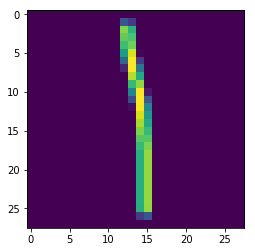

In [43]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [11]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [44]:
model.save('keras.h5')